# 8. Clustering

## Preprocessing Pipeline Overview

This preprocessing pipeline outlines the steps necessary to prepare the Telco Customer Churn dataset for our modeling. Each step is designed to address specific aspects of data quality, transformation, and feature creation. We will cover each step in a separate jupyter notebook file.

**Step 1: Data Loading**: Loading the datasets into the workspace, ensuring all necessary files are correctly imported for analysis. This includes the Kaggle dataset and the IBM datasets.

**Step 2: Dataset Integration**: Combining relevant datasets into a single, unified dataset that will serve as the foundation for subsequent analysis.

**Step 3: Handling Missing Values**: Identifying and addressing missing values in the dataset to ensure data integrity. This step ensures no significant gaps hinder the analysis.

**Step 4: Data Type Conversion**: Converting data columns to appropriate data types to optimize memory usage and prepare for feature engineering. Ensure consistency across all columns.

**Step 5: Data Exploration**: Perform initial exploratory data analysis (EDA) to understand the dataset's structure and characteristics, visualizing key features to gain insights into the data.

**Step 6: Feature Engineering**: Creating new features from the existing data to enhance model performance and capture additional insights. This includes transformations and derived features.

**Step 7: Outlier Detection**: Identifying and addressing outliers in the dataset to ensure they do not negatively impact the analysis or models.

**Step 8: Clustering Customers**: Identifying the most common customer profiles via clustering.

**Step 8: Dataset Splitting**: Splitting the dataset into training and testing subsets to prepare for model development and evaluation. This step ensures reproducibility and robust performance metrics.

Our main goal is to predict weither the customer is going to churn or not, but since it is also important to generally understand the customers, we want to do some clustering to see the 4 most common types of customers. we want to create a profile of these for types.


To find customer profiles, we can use clustering techniques.

1. **K-Means Clustering**:
    - Standardize the numerical features.
    - Use the K-Means algorithm to cluster the customers into 4 groups.
    - Analyze the cluster centers to profile each group.

2. **Hierarchical Clustering**:
    - Standardize the numerical features.
    - Use hierarchical clustering to create a dendrogram.
    - Cut the dendrogram to form 4 clusters.
    - Analyze the clusters to profile each group.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
    - Standardize the numerical features.
    - Use DBSCAN to identify clusters based on density.
    - Analyze the clusters to profile each group.

4. **PCA (Principal Component Analysis) followed by K-Means**:
    - Standardize the numerical features.
    - Apply PCA to reduce dimensionality.
    - Use K-Means to cluster the customers into 4 groups.
    - Analyze the cluster centers to profile each group.

5. **Gaussian Mixture Models (GMM)**:
    - Standardize the numerical features.
    - Use GMM to cluster the customers into 4 groups.
    - Analyze the cluster centers to profile each group.


The best method to find the most common customer profiles depends on the specific characteristics of our data and the goals of our analysis.

1. **K-Means Clustering**:
    - **Pros**: Simple to implement, efficient for large datasets, and works well when clusters are spherical and of similar size.
    - **Cons**: Assumes clusters are of similar size and shape, sensitive to outliers and initial seed selection.
    - **Best for**: When we expect well-separated, spherical clusters.

2. **Hierarchical Clustering**:
    - **Pros**: Does not require the number of clusters to be specified in advance, produces a dendrogram that can help visualize the data structure.
    - **Cons**: Computationally expensive for large datasets, less effective for large datasets.
    - **Best for**: Smaller datasets or when we want to understand the hierarchical relationships between data points.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
    - **Pros**: Can find arbitrarily shaped clusters, robust to outliers, does not require the number of clusters to be specified.
    - **Cons**: Sensitive to the choice of parameters (epsilon and min_samples), may struggle with varying densities.
    - **Best for**: When we expect clusters of varying shapes and densities, and when dealing with noise in the data.

4. **PCA (Principal Component Analysis) followed by K-Means**:
    - **Pros**: Reduces dimensionality, which can improve clustering performance and visualization, helps to remove noise.
    - **Cons**: PCA may lose some information, still inherits K-Means' limitations.
    - **Best for**: High-dimensional data where dimensionality reduction can help improve clustering results.

5. **Gaussian Mixture Models (GMM)**:
    - **Pros**: Can model clusters with different shapes and sizes, provides probabilistic cluster assignments.
    - **Cons**: Computationally more intensive, sensitive to initialization, may overfit with too many components.
    - **Best for**: When we expect clusters to have different shapes and sizes, and when you want probabilistic cluster assignments.

**What we will do**:
- Since we think that our data has noise and we expect clusters of varying shapes, **DBSCAN** might be more suitable.
- For high-dimensional data, we consider using **PCA followed by K-Means**.

## PCA

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('../2_data/telcocustomerchurn_featured.csv')

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # You can change the number of components as needed
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0 -0.166333 -0.411292
1 -1.891412  0.110002
2 -3.088194  5.530009
3  0.315661  5.482084
4 -1.896277  4.791457


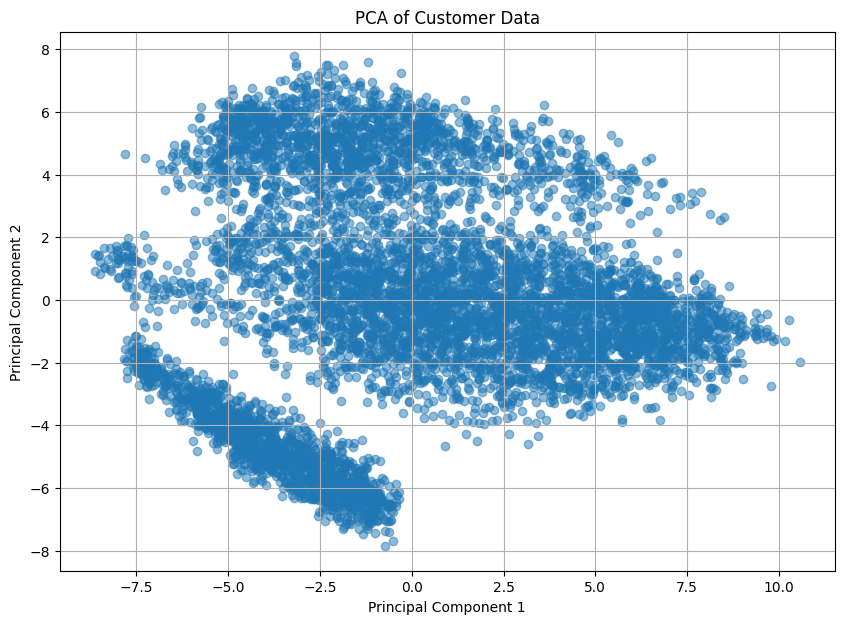

In [3]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## PCA Plot Evaluation

The scatter plot of the PCA results shows the distribution of the data points along the two principal components (PC1 and PC2). Upon visual inspection, three distinct clusters are visible:

1. **Cluster 1**: Located at the bottom left of the plot. This cluster is relatively small and compact.
2. **Cluster 2**: Positioned in the middle of the plot. This is the largest cluster, indicating a higher density of data points.
3. **Cluster 3**: Found at the top of the plot. This cluster is more spread out compared to the other two.

These clusters suggest that the data can be grouped into three main categories based on the first two principal components.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('../2_data/telcocustomerchurn_featured.csv')

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=3)  # You can change the number of components as needed
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())

        PC1       PC2       PC3
0 -0.166333 -0.411292 -0.542741
1 -1.891412  0.110002 -1.522715
2 -3.088194  5.530009 -1.669966
3  0.315661  5.482084  1.780884
4 -1.896277  4.791457 -0.759113


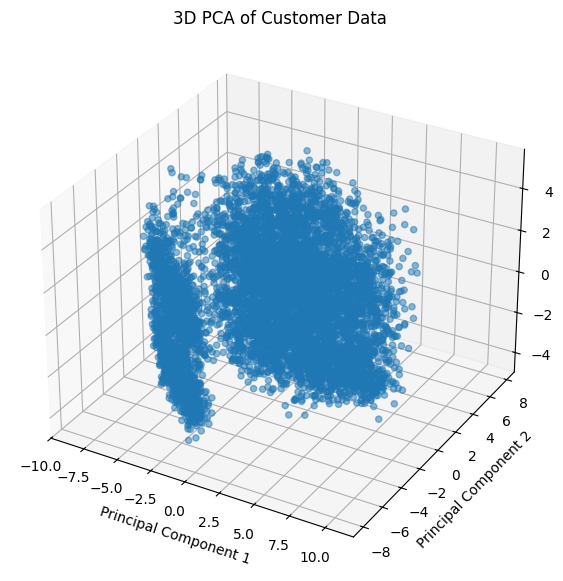

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Ensure plots are displayed in the notebook
%matplotlib inline

# Create a 3D scatter plot of the PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)
ax.set_title('3D PCA of Customer Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## 3D PCA Plot Interpretation

The 3D scatter plot of the PCA results shows the distribution of the data points along the three principal components (PC1, PC2, and PC3). Upon visual inspection, we can observe the following:

1. **Lower Cluster**: This cluster is located at the bottom of the plot. It is relatively small and compact, indicating a group of customers with similar characteristics.

2. **Upper Cluster**: This larger cluster is positioned at the top of the plot. It is more spread out compared to the lower cluster, suggesting a more diverse group of customers.

While three distinct clusters are visible, it is also possible to interpret the data as having just two main clusters:
- The **lower cluster** remains as is.
- The **upper cluster** combines the two clusters at the top, forming a larger, more diverse group.

This interpretation simplifies the clustering by focusing on the major divisions in the data, which can be useful for broader analysis and customer profiling.

In [6]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Add the K-Means cluster labels to the PCA DataFrame
pca_df['KMeans_Cluster'] = kmeans_labels

# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

# Print the first few rows of the DataFrame with the K-Means cluster labels
print(pca_df.head())

Cluster centers:
 [[-3.38330151 -3.84530597 -0.1335698 ]
 [ 4.12834697 -0.41418034  0.03830867]
 [-2.09472775  3.48410859  0.06049908]]
        PC1       PC2       PC3  KMeans_Cluster
0 -0.166333 -0.411292 -0.542741               1
1 -1.891412  0.110002 -1.522715               2
2 -3.088194  5.530009 -1.669966               2
3  0.315661  5.482084  1.780884               2
4 -1.896277  4.791457 -0.759113               2


/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_40948/2050744376.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(kmeans_labels)))


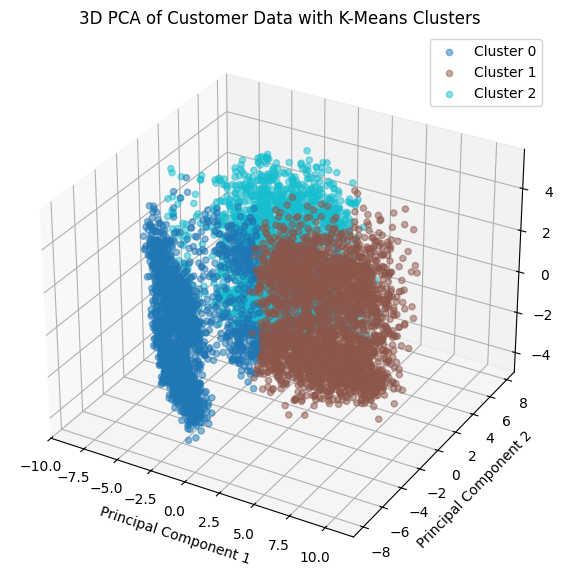

In [7]:
# Create a 3D scatter plot of the PCA results with K-Means clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = plt.cm.get_cmap('tab10', len(np.unique(kmeans_labels)))

# Plot each cluster with a different color
for cluster in np.unique(kmeans_labels):
    cluster_mask = kmeans_labels == cluster
    ax.scatter(pca_df.loc[cluster_mask, 'PC1'], pca_df.loc[cluster_mask, 'PC2'], pca_df.loc[cluster_mask, 'PC3'], 
               color=colors(cluster), label=f'Cluster {cluster}', alpha=0.5)

ax.set_title('3D PCA of Customer Data with K-Means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [8]:
# Calculate the means of the three K-Means clusters
cluster_means = pca_df.groupby('KMeans_Cluster').mean()

# Print the means of the three clusters
print("Means of the three K-Means clusters:\n", cluster_means)

Means of the three K-Means clusters:
                      PC1       PC2       PC3
KMeans_Cluster                              
0              -3.380990 -3.837643 -0.135432
1               4.123788 -0.413959  0.038806
2              -2.096929  3.494945  0.061742


Mapping the PCA components back to the original features to create a profile of the mean customers for the three clusters:

1. **Inverse Transform the PCA Components**: Use the inverse transform method of the PCA object to map the PCA components back to the original feature space.
2. **Calculate the Mean Profiles**: Calculate the mean of the original features for each cluster.

In [15]:
# Inverse transform the PCA components to get the original features
mean_pca_components = cluster_means[['PC1', 'PC2', 'PC3']]
mean_original_features = pca.inverse_transform(mean_pca_components)
pd.set_option('display.max_columns', None)

# Create a DataFrame with the mean original features for each cluster
mean_original_features_df = pd.DataFrame(mean_original_features, columns=data.columns)
mean_original_features_df.index = cluster_means.index

# Print the mean original features for each cluster
print("Mean original features for each cluster:\n", mean_original_features_df)

Mean original features for each cluster:
                 Unnamed: 0  Count  Gender  Age  Under 30  Senior Citizen  \
KMeans_Cluster                                                             
0                      NaN    NaN     NaN  NaN       NaN             NaN   
1                      NaN    NaN     NaN  NaN       NaN             NaN   
2                      NaN    NaN     NaN  NaN       NaN             NaN   

                Married  Dependents  Number of Dependents  City  Zip Code  \
KMeans_Cluster                                                              
0                   NaN         NaN                   NaN   NaN       NaN   
1                   NaN         NaN                   NaN   NaN       NaN   
2                   NaN         NaN                   NaN   NaN       NaN   

                Latitude  Longitude  Referred a Friend  Number of Referrals  \
KMeans_Cluster                                                                
0                    NaN        N

In [18]:
# Calculate the mean of each feature for each cluster
cluster_means = data.groupby(pca_df['KMeans_Cluster']).mean()

# Calculate the variance of each feature across the clusters
feature_variances = cluster_means.var(axis=0)

# Identify the three features with the highest variance
top_features = feature_variances.nlargest(3).index

# Add "Churned" to the top features
top_features = top_features.append(pd.Index(['Churn Value']))

# Print the top features and their means for each cluster
print("Top features that differentiate the clusters:")
print(cluster_means[top_features])

Top features that differentiate the clusters:
                    LoyaltyID  Total Revenue  Total Charges  Churn Value
KMeans_Cluster                                                          
0               550837.311571    1432.133636     755.810690     0.027601
1               547103.951140    5737.949689    4509.759446     0.082157
2               553806.051336    1176.559654     908.310747     0.663606


## Analysis of Customer Profiles and Churn Prediction

### Cluster Profiles

1. **Cluster 0**:
    - **LoyaltyID**: 550837.31
    - **Total Revenue**: 1432.13
    - **Total Charges**: 755.81
    - **Churn Value**: 0.03

    **Profile**: Customers in this cluster have moderate loyalty and generate moderate revenue. They have relatively low total charges and a very low churn rate, indicating high satisfaction and stability.

2. **Cluster 1**:
    - **LoyaltyID**: 547103.95
    - **Total Revenue**: 5737.95
    - **Total Charges**: 4509.76
    - **Churn Value**: 0.08

    **Profile**: Customers in this cluster have high loyalty and generate the highest revenue. They have high total charges but a low churn rate, indicating they are valuable and satisfied customers.

3. **Cluster 2**:
    - **LoyaltyID**: 553806.05
    - **Total Revenue**: 1176.56
    - **Total Charges**: 908.31
    - **Churn Value**: 0.66

    **Profile**: Customers in this cluster have the highest loyalty but generate the lowest revenue. They have moderate total charges and a high churn rate, indicating dissatisfaction and a high likelihood of leaving.

### Conclusions

- **Cluster 0** represents stable customers with moderate revenue and low churn risk.
- **Cluster 1** represents highly valuable customers with high revenue and low churn risk.
- **Cluster 2** represents dissatisfied customers with low revenue and high churn risk.

### Churn Prediction

To predict churn, focus on the features that differentiate the clusters, such as `Total Revenue`, `Total Charges`, and `LoyaltyID`. Customers with high `Total Charges` and low `Total Revenue` are more likely to churn, as seen in Cluster 2.

## DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

# Apply DBSCAN to the PCA results
dbscan_pca = DBSCAN(eps=1, min_samples=50)
dbscan_pca_labels = dbscan_pca.fit_predict(pca_data)

# Add the cluster labels to the PCA DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_pca_labels

# Find the two most common clusters in the PCA results
unique_pca, counts_pca = np.unique(dbscan_pca_labels, return_counts=True)
cluster_counts_pca = dict(zip(unique_pca, counts_pca))
sorted_clusters_pca = sorted(cluster_counts_pca.items(), key=lambda item: item[1], reverse=True)
most_common_clusters_pca = sorted_clusters_pca[:2]

print("Most common clusters in PCA results:", most_common_clusters_pca)

Most common clusters in PCA results: [(np.int64(-1), np.int64(1835)), (np.int64(0), np.int64(1592))]


/var/folders/qg/82ll9gvd1pd4329hnkdpf8ch0000gn/T/ipykernel_40948/3863988791.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


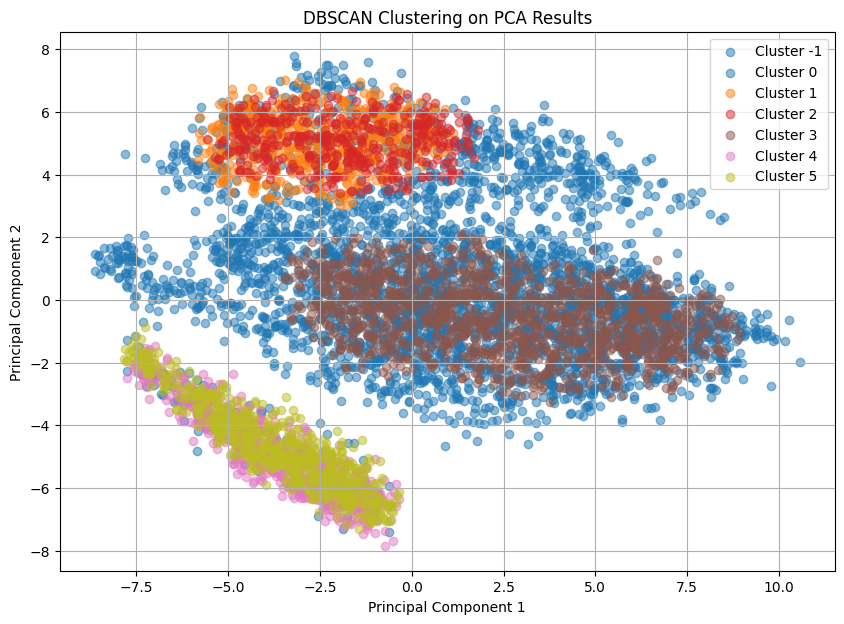

In [10]:
# Plot the DBSCAN results on the PCA plot
plt.figure(figsize=(10, 7))
unique_labels = np.unique(dbscan_pca_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    label_mask = dbscan_pca_labels == label
    plt.scatter(pca_df.loc[label_mask, 'PC1'], pca_df.loc[label_mask, 'PC2'], 
                color=colors(label), label=f'Cluster {label}', alpha=0.5)

plt.title('DBSCAN Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## DBSCAN Plot Evaluation

The DBSCAN clustering results, when plotted on the PCA results, show the distribution of data points across six clusters. Upon visual inspection, we can observe the following:

1. **Cluster Overlap**: The six DBSCAN clusters mainly overlap with the three clusters identified in the PCA plot. This indicates that the DBSCAN algorithm has identified sub-clusters within the broader clusters found by PCA.

2. **Lower Cluster**: In the lower cluster of the PCA plot, multiple DBSCAN clusters overlap in one place. This suggests that the lower cluster is more heterogeneous and contains several sub-groups with distinct characteristics.

3. **Middle and Upper Clusters**: The middle and upper clusters in the PCA plot also show some overlap with the DBSCAN clusters. However, the overlap is less pronounced compared to the lower cluster, indicating that these clusters are more homogeneous.

Overall, the DBSCAN clustering provides a more granular view of the customer segments, revealing sub-clusters within the broader clusters identified by PCA. This can help in understanding the diversity within each customer segment and tailoring strategies accordingly.